# Research of ads for the sale of apartments

We have the data of the real estate service - an archive of announcements for the sale of apartments in St. Petersburg and neighboring settlements for several years. We need to learn how to determine the market value of real estate objects - set the parameters. This will allow building an automated system: it will track anomalies and fraudulent activity.

There are two types of data available for each apartment for sale. 
The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the city center, airport, nearest park and water.

###  1. About data 

In [1]:
#library import
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#check data
real_estate_data = pd.read_csv('real_estate_data.csv',sep='\t')
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
display(real_estate_data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Conclusion

We use tabulation for read data and we have the table with 23699 entries and 22 columns:

* airports_nearest - distance to the nearest airport in meters (m)
* balcony - number of balconies
* ceiling_height - ceiling height (m)
* cityCenters_nearest - distance to the city center (m)
* days_exposition - how many days the ad was posted (from publication to sale)
* first_day_exposition - publication date
* floor - floor
* floors_total - total floors in the house
* is_apartment - apartments (boolean type)
* kitchen_area - kitchen area in square meters (m²)
* last_price - price at the time of unpublishing
* living_area - living area in square meters (m²)
* locality_name - city name
* open_plan - open apartment plan  (boolean type)
* parks_around3000 - the number of parks within a 3 km radius
* parks_nearest - distance to the nearest park (m)
* ponds_around3000 - the number of rivers/lakes within a radius of 3 km
* ponds_nearest - distance to the nearest rivers/lakes (m)
* rooms - number of rooms
* studio - studio apartment (boolean type)
* total_area - the area of the apartment in square meters (m²)
* total_images - the number of apartment photos in the ad

The large number of float columns is not good. NaN values ​​are also must be replace to zero, empty value or average. Most likely, the Nan values ​​are not filled in due to the human factor. If a person submitted an ad himself, he might not have specified all the parameters.

After preprocessing, we need to create columns for:
* price per square meter;
* day of the week, month and year of publication of the ad;
* apartment floor; options - first, last, other;
* the ratio of living and total area, as well as the ratio of kitchen area to total.

###  2. Data preprocessing

In [4]:
#fill empties
real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].fillna(value='0')
real_estate_data['floors_total'] = real_estate_data['floors_total'].fillna(value='0')
real_estate_data['living_area'] = real_estate_data['living_area'].fillna(value='0')
real_estate_data['kitchen_area'] = real_estate_data['kitchen_area'].fillna(value='0')
real_estate_data['balcony'] = real_estate_data['balcony'].fillna(value='0')
real_estate_data['airports_nearest'] = real_estate_data['airports_nearest'].fillna(value='0')
real_estate_data['cityCenters_nearest'] = real_estate_data['cityCenters_nearest'].fillna(value='0')
real_estate_data['parks_around3000'] = real_estate_data['parks_around3000'].fillna(value='0')
real_estate_data['parks_nearest'] = real_estate_data['parks_nearest'].fillna(value='0')
real_estate_data['ponds_around3000'] = real_estate_data['ponds_around3000'].fillna(value='0')
real_estate_data['ponds_nearest'] = real_estate_data['ponds_nearest'].fillna(value='0')
real_estate_data['days_exposition'] = real_estate_data['days_exposition'].fillna(value='0')
real_estate_data['locality_name'] = real_estate_data['locality_name'].fillna(value='')

real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  object 
 6   floors_total          23699 non-null  object 
 7   living_area           23699 non-null  object 
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  object 
 13  balcony               23699 non-null  object 
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

### Conclusion
Nans replaced to zero or empty type.

In [5]:
# data types to int
real_estate_data['last_price'] = real_estate_data['last_price'].astype('int')
real_estate_data['floors_total'] = real_estate_data['floors_total'].astype('int')
real_estate_data['balcony'] = real_estate_data['balcony'].astype('int')
real_estate_data['airports_nearest'] = real_estate_data['airports_nearest'].astype('int')
real_estate_data['cityCenters_nearest'] = real_estate_data['cityCenters_nearest'].astype('int')
real_estate_data['parks_around3000'] = real_estate_data['parks_around3000'].astype('int')
real_estate_data['parks_nearest'] = real_estate_data['parks_nearest'].astype('int')
real_estate_data['ponds_around3000'] = real_estate_data['ponds_around3000'].astype('int')
real_estate_data['ponds_nearest'] = real_estate_data['ponds_nearest'].astype('int')
real_estate_data['days_exposition'] = real_estate_data['days_exposition'].astype('int')

# data types to float
real_estate_data['ceiling_height'] = real_estate_data['ceiling_height'].astype('float')
real_estate_data['living_area'] = real_estate_data['living_area'].astype('float')
real_estate_data['kitchen_area'] = real_estate_data['kitchen_area'].astype('float')

# data types to bool
real_estate_data['is_apartment'] = real_estate_data['is_apartment'].astype('bool')

real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int32  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int32  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int32  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

### Conclusion
Float to int:
last_price - the price is calculated in rubles without kopeks
floors_total - the number of floors cannot be half
balcony - the number of balconies is also an integer
airports_nearest - counted in meters
cityCenters_nearest - also counted in meters
parks_around3000 - also counted in meters
parks_nearest - also counted in meters
ponds_around3000 - also counted in meters
ponds_nearest - also counted in meters
days_exposition - days is an integer

Replacing to float:
ceiling_height - The ceiling height is almost always float.
living_area - like living space.
kitchen_area - and kitchen.

Replacing to bool:
is_apartment - Should indicate an apartment or not, so bool.

I did not change the names of cities,  they should be written with a capital letter, moreover, this is an automatic field.

In [6]:
#check duplicates
real_estate_data.duplicated().sum()

0

In [7]:
#change price to 1000 roubles
real_estate_data['last_price'] = real_estate_data['last_price'] / 1000
display(real_estate_data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0
1,7,3350.0,40.4,2018-12-04T00:00:00,1,0.00,11,18.6,1,True,...,11.0,2,посёлок Шушары,12817,18603,0,0,0,0,81
2,10,5196.0,56.0,2015-08-20T00:00:00,2,0.00,5,34.3,4,True,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900.0,159.0,2015-07-24T00:00:00,3,0.00,14,0.0,9,True,...,0.0,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121


### Conclusion

In general, the data is in a good form now. 

Data types and empty strings was replaced.

No duplicates found.

There are empty values in airports, parks and reservoirs, this is normal.

There are no empty values in the total area. Good news.

###  3. Count and add to table

In [8]:
#price_square_meter
real_estate_data['price_square_meter'] = real_estate_data['last_price'] / real_estate_data['total_area']

display(real_estate_data.price_square_meter.head())

0    120.370370
1     82.920792
2     92.785714
3    408.176101
4    100.000000
Name: price_square_meter, dtype: float64

### Conclusion
New column price_square_meter. We use standart function for calculation

In [9]:
#make column with day, month and year of publication
real_estate_data['day_month_year'] = pd.to_datetime(real_estate_data['first_day_exposition'], format='%Y-%m-%d')

display(real_estate_data.day_month_year.head(15))

0    2019-03-07
1    2018-12-04
2    2015-08-20
3    2015-07-24
4    2018-06-19
5    2018-09-10
6    2017-11-02
7    2019-04-18
8    2018-05-23
9    2017-02-26
10   2017-11-16
11   2018-08-27
12   2016-06-30
13   2017-07-01
14   2016-06-23
Name: day_month_year, dtype: datetime64[ns]

### Conclusion
New column day_month_year. We use standart function for calculation

In [10]:
#add floor type
def floor_type_func(row):
    
    floors = row['floor']
    last = row['floors_total']
    
    if floors == 1:
            return 'first'
    if floors == last:
            return 'last'
    return 'other'


real_estate_data['floor_type'] = real_estate_data.apply(floor_type_func, axis=1)

display(real_estate_data.floor_type.head())

0    other
1    first
2    other
3    other
4    other
Name: floor_type, dtype: object

### Conclusion
New column floor_type. We use standart function for calculation

In [11]:
#living_to_total_area to total_area
real_estate_data['living_to_total_area'] = real_estate_data['living_area'] / real_estate_data['total_area']

display(real_estate_data.living_to_total_area.head())

0    0.472222
1    0.460396
2    0.612500
3    0.000000
4    0.320000
Name: living_to_total_area, dtype: float64

### Conclusion
New column living_to_total_area. We use standart function for calculation

In [12]:
#kitchen_to_total_area to total_area
real_estate_data['kitchen_to_total_area'] = real_estate_data['kitchen_area'] / real_estate_data['total_area']

display(real_estate_data.kitchen_to_total_area.head())

0    0.231481
1    0.272277
2    0.148214
3    0.000000
4    0.410000
Name: kitchen_to_total_area, dtype: float64

### Conclusion
New column kitchen_to_total_area. We use standart function for calculation

### Conclusion
New columns help us in next conclusions.

###  4. Exploratory data analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000215776E5D88>]],
      dtype=object)

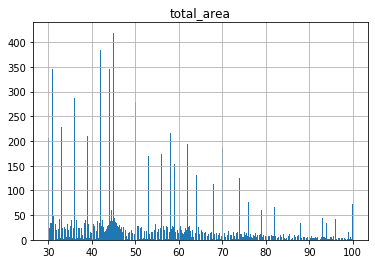

In [13]:
#hist total_area
real_estate_data.hist('total_area', bins= 900, range = (30,100))

### Conclusion
Bins is taken at the it's maximum value.

On the histogram without selecting values,we saw  the 0-200 range, so I refined the histogram several times.
First 0-200, then 30 - 85.

Most of the apartments are 40-50, also you can see many values of about 60 and a little less than about 30.

Most likely these are one-tworoom apartmet and studios.

Everything below is very small studios, maybe rooms got here by mistake, the human factor is still with us.

Everything above is either very large apartments, they are rare or also mistakes: people wrote that, perhaps a house is for sale, etc.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021579251048>]],
      dtype=object)

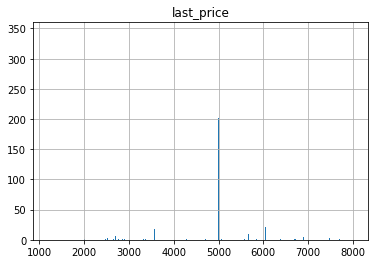

In [14]:
#hist last price
real_estate_data.hist('last_price', bins= 20000, range = (1200, 8000))

### Conclusion

Bins by the maximum value is hardly suitable here, the number is too large, although it is translated into 1000 (763000).

Let's put an approximately real value of 20 million, and make a sample from a minimum of 1.2 million to popular 8 million.

Most of the apartments cost 5 million, these are oneroom apartments, which coincides with the previous histogram.

Studios and tworooms apartments also coincide with the previous findings.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002150889E788>]],
      dtype=object)

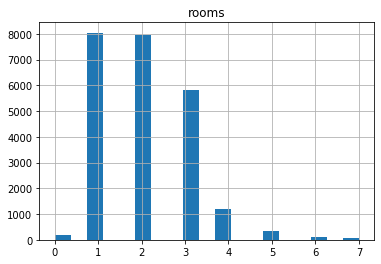

In [15]:
#hist number of rooms
real_estate_data.hist('rooms', bins= 19,range = (0,7))

### Conclusion

Bins is taken at the maximum value.

On the histogram without selecting values, it was clear that most of the values fall within the range 0-7.

There are almost equal numbers of one and tworooms apartments, a little less than threerooms, even less than four-rooms. 

Suddenly, studios are at the bottom of the list. All that is above is either an error when entering data, or some kind of mega house.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002150A617DC8>]],
      dtype=object)

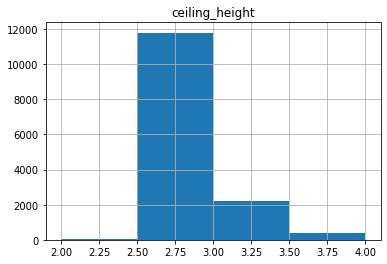

In [16]:
#hist ceiling_height
real_estate_data.hist('ceiling_height', bins= 4, range = (2,4))                

### Conclusion

First, bins is taken by the maximum value, but it is equal to 100, this is  an error.

Let's take 5, the value is quite possible.

On the histogram without selecting values, it was seen that most of the values ​​fall within the range 2-4.

The values 0-1 can be ignored, this is the lack of data. Or the sale of a foundation, but it should be of a different category.

Take 2-4. 

Values 2.5-3 are the majority, quite real. 

3-3.5 less is also true. 

Other values сan also exist here. For example, an old house somewhere far away  or some business-class apartment.

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002150B189088>]],
      dtype=object)

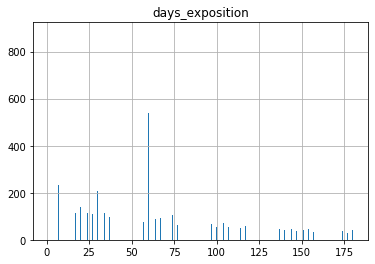

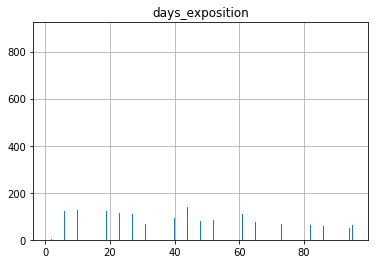

In [17]:
#Apartment sale time
display(real_estate_data.days_exposition.describe())
real_estate_data.hist('days_exposition', bins=1580,  range = (1,180)) 
real_estate_data.hist('days_exposition', bins=1580,  range = (1,95)) 

### Conclusion
Bins was taken by the maximum value.

On the histogram without a choice of values, it was clear that most of the values ​​fall within the range 0-600, but it is still difficult to clarify, the spread is too large.

We can immediately say that one is either an error when entering data, or a person changed his mind about selling, or placed it on purpose for a short time.

The median is 180, which is about half a year, quite a realistic period for an apartment, but the average is 95, which is also the real sale period, although it is 2 times lower. It all depends on the price and condition of the property.

If the apartment has been sold for more than 232 days, then either there is an error in entering (it was not removed from the sale for a long time), or there is something wrong with the object. But nevertheless, these data have the right to exist.

It seems to me that everything that is longer than a year is an input error (the apartment is sold, but the advertisement is hanging) or something is wrong with the object.

If you compare these histograms, you can see that most often apartments are sold in 2 months.

The median shows that faster sales happen more often than protracted ones. This is logical, if the apartment is adequate, there is easy deal and there is no error in the data, then you can sell it faster.

For long sales, I would take anything above the median. Here you need to ask questions to the data collectors: how often options are deleted, whether they are monitored at all to ensure that they are deleted, whether all data has been entered, etc.

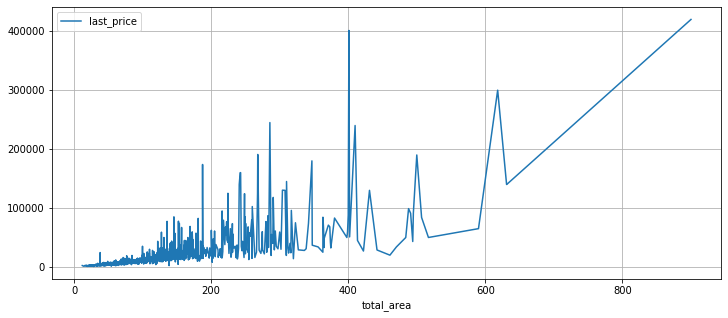

In [18]:
#Does the price depend on the square meter
(real_estate_data
         .pivot_table(index='total_area', values='last_price', aggfunc='median')
         .plot(grid=True, figsize=(12, 5))             
 );

The price, of course, depends on the square meter. Basically, fluctuations are not significant, especially up to 100 meters where standard apartments are. Most of the differences are in large values.

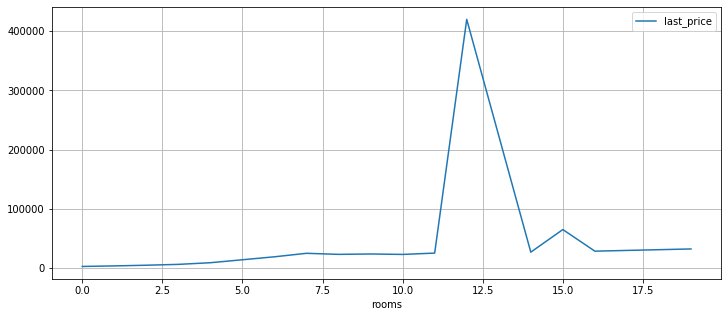

In [19]:
#Does the price depend on rooms number
(real_estate_data
         .pivot_table(index='rooms', values='last_price', aggfunc='median')
         .plot(grid=True, figsize=(12, 5))             
 );

The more rooms, the more expensive the apartment. It is logical.
Number 12 can be some rare wow offer.

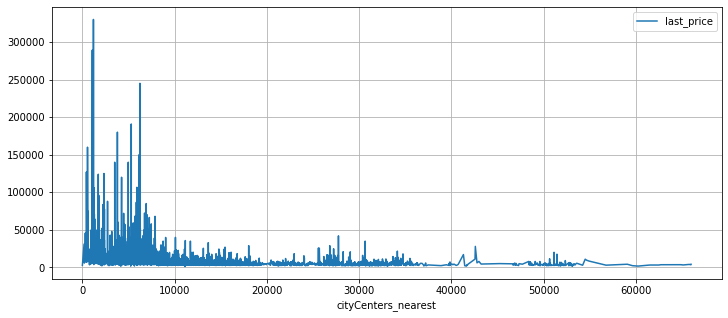

In [20]:
#Does the price depend on the city center
(real_estate_data
         .pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
         .plot(grid=True, figsize=(12, 5))             
 );

The fluctuations are very different in the range up to 10,000.

I think that there are still many factors influencing such as the number of rooms, the view from the window, etc.

Reducing the price after 10,000 is quite logical, if you want to live closer, pay more.

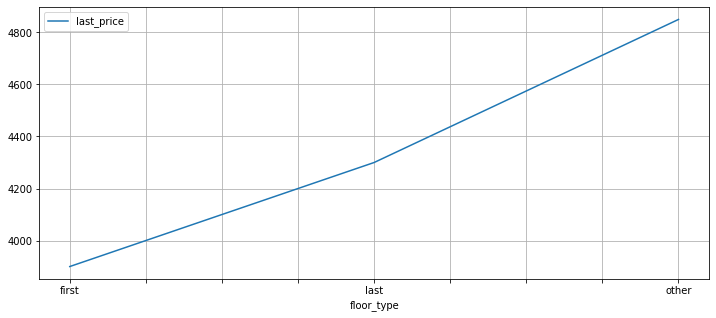

In [21]:
#Does the price depend on the floor type
(real_estate_data
         .pivot_table(index='floor_type', values='last_price', aggfunc='median')
         .plot(grid=True, figsize=(12, 5))             
 );

An absolutely logical schedule. 

Apartments on the ground floor are the cheapest, on the last floor they are more expensive, but not everyone likes heights. 

The most popular floors are other.

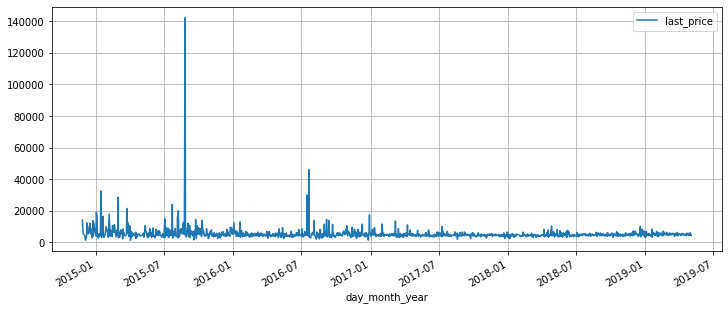

In [22]:
#Does the price depend on the apartment sale time
(real_estate_data
         .pivot_table(index='day_month_year', values='last_price', aggfunc='median')
         .plot(grid=True, figsize=(12, 5))             
 );

The peak of sales / purchases fell on the second part of 2015, before that there was a financial crisis (another) and a little later everyone decided to invest and earn money.

The second peak in the second part of 2016. Also after financial crisis.

On the whole, apartments were selling better until mid-2015, the crisis was not so strong. Then it is worse, but there are sales. Mostly in the first half of the year.

In [23]:
#cities with max and min cost of apartment

#top 10 cities
top_city = real_estate_data.locality_name.value_counts().sort_values(ascending=False).head(10).index
#display(top_city)

#mean price_square_meter
display(real_estate_data
         .query('locality_name in @top_city')
         .pivot_table(index='locality_name', values='price_square_meter', aggfunc='mean')       
);

,price_square_meter
locality_name,
Всеволожск,68.654474
Выборг,58.141909
Гатчина,68.746147
Колпино,75.424579
Пушкин,103.125819
Санкт-Петербург,114.849009
деревня Кудрово,92.473548
посёлок Мурино,85.752189
посёлок Парголово,90.175913


* Vsevolozhsk	68.654474
* Vyborg	58.141909
* Gatchina	68.746147
* Kolpino	75.424579
* Pushkin	103.125819
* Saint Petersburg	114.849009
* Kudrovo	92.473548
* Murino	85.752189
* Pargolovo	90.175913
* Shushary	78.677364

The table is small, this is good, you can immediately draw a conclusion.

The most expensive of these 10 is in St. Petersburg (not surprising at all), and cheaper in Vyborg(very far), it is also logical.

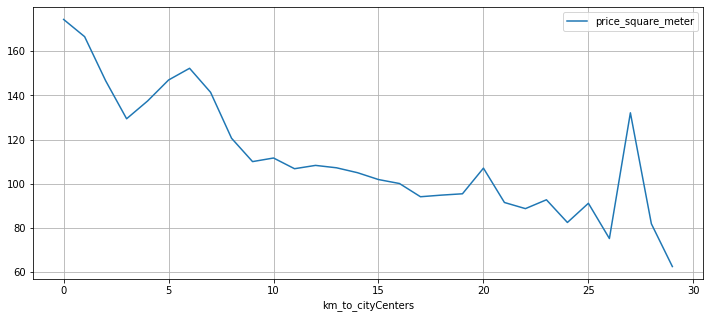

In [24]:
#city center

#column with km
real_estate_data['km_to_cityCenters'] = (real_estate_data['cityCenters_nearest'] / 1000).astype(int)
#display(real_estate_data['km_to_cityCenters'].head(15))

#only St. Petersburg  
city_center_price = (real_estate_data.loc[real_estate_data['locality_name'] == 'Санкт-Петербург'])

#mean price for km and graph

display(city_center_price
        .pivot_table(index='km_to_cityCenters', values='price_square_meter', aggfunc='mean')
        .plot(grid=True, figsize=(12, 5))
);

For the center we can take a zone 6 km away. 

Yes, the chart falls after 3, but then it goes up again. 

Most likely, the fall is associated with a specific location in the center (right deep in the center, where there is no transport) and with the condition of the apartment (whatever the central location, it is difficult to sell a bad apartment for a high price).

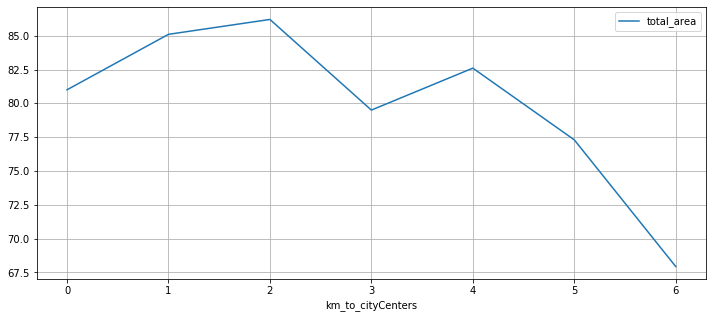

In [25]:
#square of apartment in city center

#only center
real_center = city_center_price.query('km_to_cityCenters <= 6')
#real_center.head(15)

#graph
display(real_center
        .pivot_table(index='km_to_cityCenters', values='total_area', aggfunc='median')
        .plot(grid=True, figsize=(12, 5))
);

The largest apartments in the center with an area of 85 meters, a short distance from the center, are usually former communal apartments or completely new houses, so the price skyrockets. 

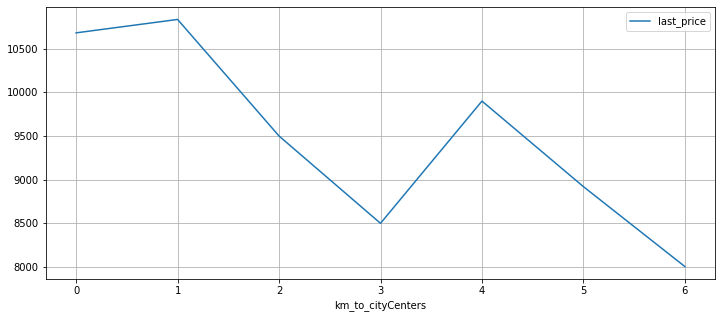

In [26]:
#price on apartment in city center

display(real_center
        .pivot_table(index='km_to_cityCenters', values='last_price', aggfunc='median')
        .plot(grid=True, figsize=(12, 5))
);

The closer to the center, the more expensive. It is logical. A dip at 3 km is also logical. Usually no transport goes there and the houses are sooo old.

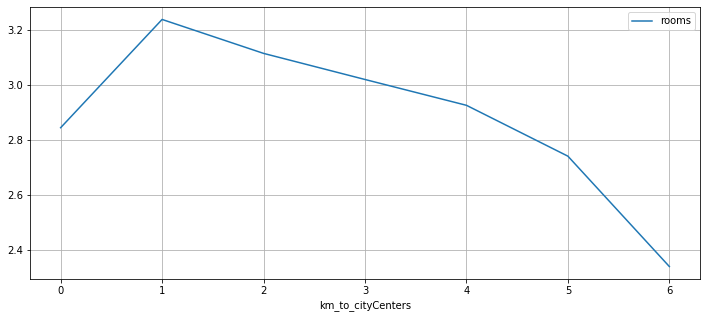

In [27]:
#rooms number in city center

display(real_center
        .pivot_table(index='km_to_cityCenters', values='rooms', aggfunc='mean')
        .plot(grid=True, figsize=(12, 5))
);

The most expensive apartments in the center are one-tworooms apartments. A rare look for a center, usually well renovated or in a new building.

The threerooms apartments are standard, there are many of them, so the price drops.

Price for 4 rooms is rises, usually it is the former communal flat.

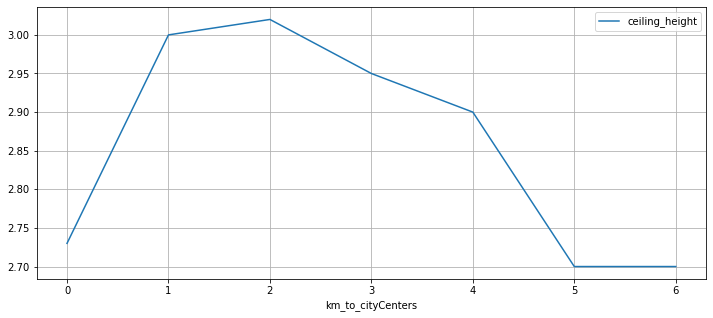

In [28]:
#ceiling_height in city center

display(real_center
        .pivot_table(index='km_to_cityCenters', values='ceiling_height', aggfunc='median')
        .plot(grid=True, figsize=(12, 5))
);

High ceilings prevail in the center. The steep 5km drop could be due to a data error or the sale of a basement or foundation.

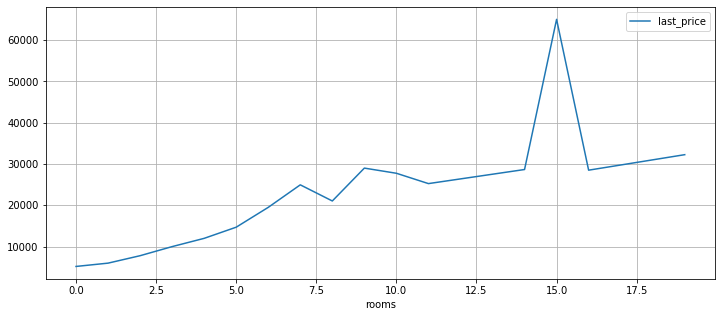

In [29]:
#Does the price depend on the number of rooms in the center
display(real_center
         .pivot_table(index='rooms', values='last_price', aggfunc='median')
         .plot(grid=True, figsize=(12, 5))             
);

In the trend, communal apartments are large and small, no wonder.

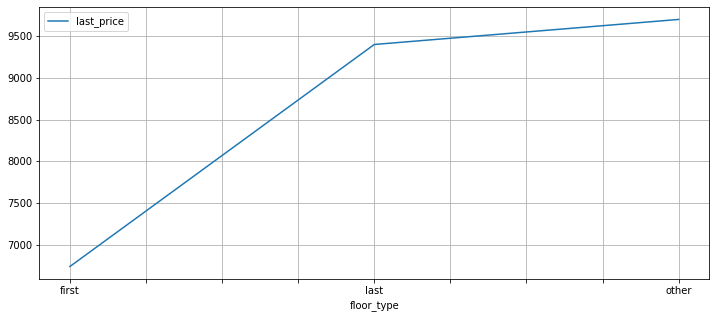

In [30]:
#Does the price depend on floor_type in the center
display(real_center
         .pivot_table(index='floor_type', values='last_price', aggfunc='median')
         .plot(grid=True, figsize=(12, 5))             
);

Yes, the price depends. The middle floor is almost equal to the last one. In the center, people love to admire the beauty, but you have to pay for everything. The first floor is unpopular, too many people walk.

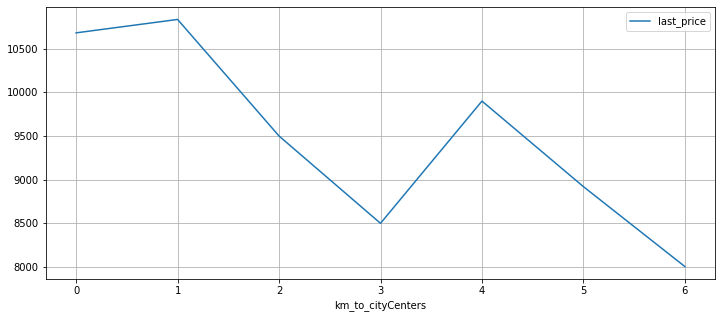

In [31]:
#Does the price depend on the city center
display(real_center
         .pivot_table(index='km_to_cityCenters', values='last_price', aggfunc='median')
         .plot(grid=True, figsize=(12, 5))             
);

The closer to the center, the more expensive. It is logical. A dip at 3 km is also logical. Usually no transport goes there and the houses are sooo old.

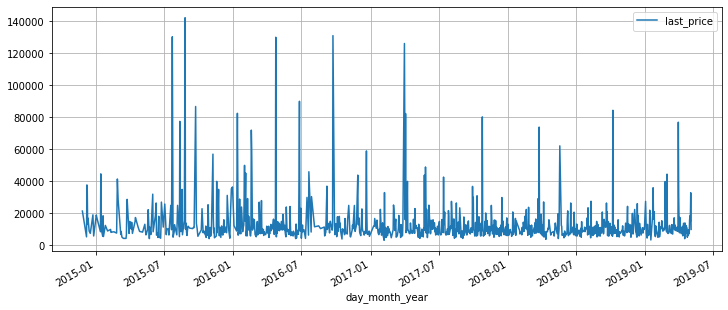

In [32]:
#Does the price depend on date of ad placement in the city center
display(real_center
         .pivot_table(index='day_month_year', values='last_price', aggfunc='median')
         .plot(grid=True, figsize=(12, 5))             
);

I don't think there is anything to say about addiction. Unless, apartments are more often sold during the warm season.

###  5. Final сonclusion

**The area of an apartment in the center and not in center**: if in the whole city the leading apartments are about 40 meters, then in the center, on the contrary, larger areas are popular. Plus, there are more of them.

**The price of an apartment in the center and not in center:** as I said, the closer to the center, the more expensive. Metro, job, museums. Everything is near.

**Number of rooms in an apartment in the center and not in center:** In the center, apartments with a huge number of rooms stand out, while ordinary 1-2-3-room apartments are popular in the city.

**Height of ceilings in an apartment in the center and not in center:** in the center there are higher ceilings than in general in the city.

**A floor in an apartment in the center and not in center:** the first floor is unpopular everywhere, but last are more relevant in the center, the views are more beautiful.

**Remoteness from the center:** beautiful dependence, far = cheap. Exceptions do happen, but they are extremely rare.

**Date when the ad was posted in an apartment in the center and not in center:** there is not much difference, it seems to me. This is not a bicycle, but in general, the warm season is in the lead, it is more convenient to cross.